# Домашнее задание 

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/00240/. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-v0_8-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN


RANDOM_STATE = 17

In [2]:
from matplotlib import pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt").astype(int)

X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt").astype(int)

Ссылка на датасет не работает, скачала вот отсюда: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

In [3]:
train = pd.read_csv(r"D:\\samsung_train.csv")
test = pd.read_csv(r"D:\\samsung_test.csv")


In [4]:
df = pd.concat([train, test])


In [5]:
X = df.drop('Activity', axis=1)
y = df['Activity']

In [13]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Activity, dtype: int64

In [6]:
def activity_to_num(activities):
    dct = {'WALKING' : 1, 'WALKING_UPSTAIRS' : 2, 'WALKING_DOWNSTAIRS' : 3, 'SITTING' : 4, 'STANDING' : 5, 'LAYING' : 6}
    return dct[activities]
    
y = y.apply(activity_to_num)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [7]:
#your code here
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

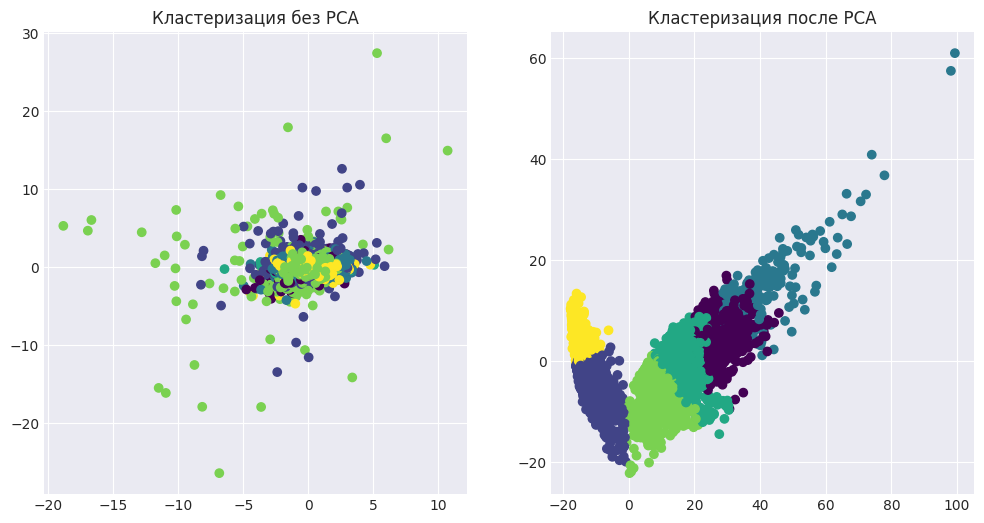

In [8]:

pca = PCA(0.9) 
X_pca = pca.fit_transform(X_scaled)


#код для визуализации взяла чужой

kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(X_scaled)

kmeans_pca = KMeans(n_clusters=6)
y_pred_pca = kmeans_pca.fit_predict(X_pca)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis')
plt.title("Кластеризация без PCA")
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca, cmap='viridis')
plt.title("Кластеризация после PCA")
plt.show()

Визуализируйте данные в проекции на первые две главные компоненты.

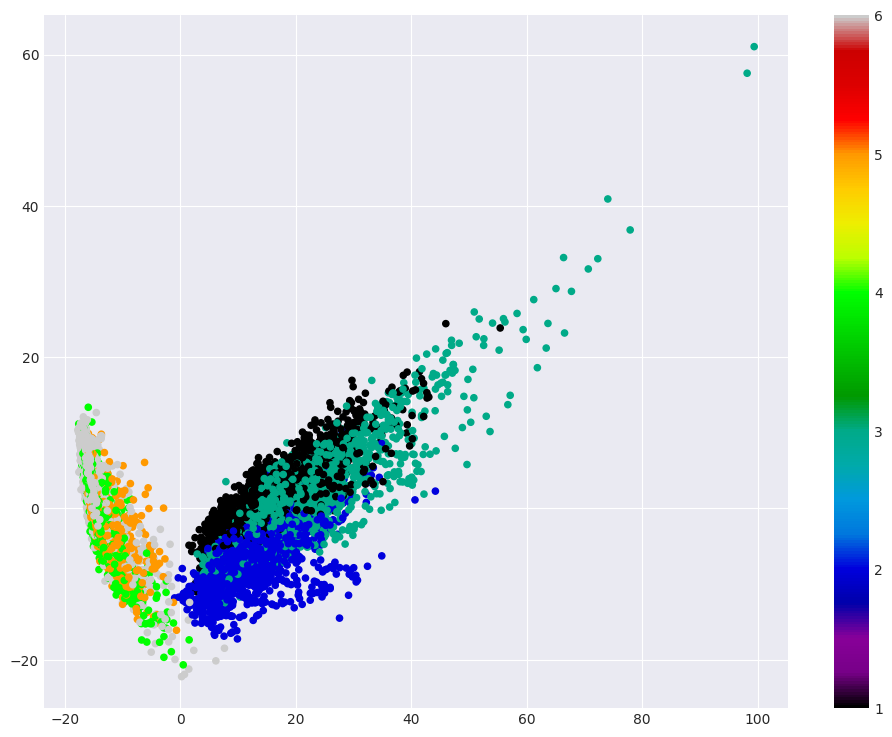

In [152]:
pca = PCA(n_components=2) 
X_pca_n2 = pca.fit_transform(X_scaled)
plt.scatter(X_pca_n2[:, 0], X_pca_n2[:, 1], c=y, s=20, cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.colorbar()



Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [12]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init=100)
y_pred_pca = kmeans_pca.fit_predict(X_pca)  

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

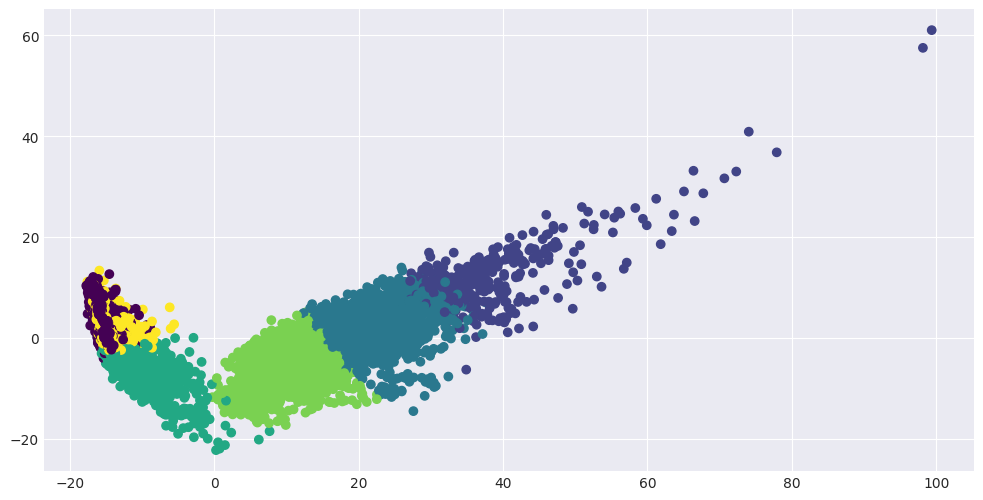

In [13]:
#PCA(0.9)
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca, cmap='viridis')
plt.show()
#в целом примерно то же делала выше, но там у pca немного другие параметры и код не мой

Выведите на экран значения метрик качества кластеризации

In [14]:
print(f"Homogeneity: {metrics.homogeneity_score(y, y_pred_pca)}")
print(f"Completeness: {metrics.completeness_score(y, y_pred_pca)}")
print(f"V-measure: {metrics.v_measure_score(y, y_pred_pca)}")
print(f"Adjusted Rand-Index: {metrics.adjusted_rand_score(y, y_pred_pca)}")
print(f"Adjusted mutual info score: {metrics.adjusted_mutual_info_score(y, y_pred_pca)}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, y_pred_pca, sample_size=1000)}")



Homogeneity: 0.5409664378907447
Completeness: 0.5793593250260052
V-measure: 0.5595050309333887
Adjusted Rand-Index: 0.4196140067187371
Adjusted mutual info score: 0.5591946887164699
Silhouette Coefficient: 0.04089322337568656


Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [149]:
ag = AgglomerativeClustering(n_clusters=6, 
                             linkage='ward')
ag.fit(X_pca)
y_pred_ag = ag.fit_predict(X_pca)

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [146]:
print(f"Homogeneity AG: {metrics.homogeneity_score(y, y_pred_ag)}\t\tHomogeneity KM: {metrics.homogeneity_score(y, y_pred_pca)}")
print(f"Completeness AG: {metrics.completeness_score(y, y_pred_ag)}\t\tCompleteness KM: {metrics.completeness_score(y, y_pred_pca)}")
print(f"V-measure AG: {metrics.v_measure_score(y, y_pred_ag)}\t\tV-measure KM: {metrics.v_measure_score(y, y_pred_pca)}")
print(f"Adjusted Rand-Index AG: {metrics.adjusted_rand_score(y, y_pred_ag)}\t\tAdjusted Rand-Index KM: {metrics.adjusted_rand_score(y, y_pred_pca)}")
print(f"Adjusted mutual info score AG: {metrics.adjusted_mutual_info_score(y, y_pred_ag)}\t\tAdjusted mutual info score KM: {metrics.adjusted_mutual_info_score(y, y_pred_pca)}")
print(f"Silhouette Coefficient AG: {metrics.silhouette_score(X, y_pred_ag, sample_size=1000)}\t\tSilhouette Coefficient KM: {metrics.silhouette_score(X, y_pred_pca, sample_size=1000)}")




Homogeneity AG: 0.5826418595177956		Homogeneity KM: 0.43339237957835475
Completeness AG: 0.665039374855356		Completeness KM: 0.4824266160944024
V-measure AG: 0.6211198298785842		V-measure KM: 0.4565968168578925
Adjusted Rand-Index AG: 0.4881185702762452		Adjusted Rand-Index KM: 0.2908956670867282
Adjusted mutual info score AG: 0.6208444850894412		Adjusted mutual info score KM: 0.4562066628127033
Silhouette Coefficient AG: 0.03993873600461963		Silhouette Coefficient KM: 0.03170936640073909


Почти все метрики у AgglomerativeClustering немного выше, чем у KMeans.

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [20]:
import sys
sys.setrecursionlimit(100000) 

In [ ]:
distance_mat = pdist(X_pca) 

temp = hierarchy.linkage(X_pca, 'single')
plt.figure()
 
dn = hierarchy.dendrogram(temp, color_threshold=.2)
#он не смог. Смог колаб, но там получалось одно сплощное пятно на графике, возможно, слишком много данных.

: 

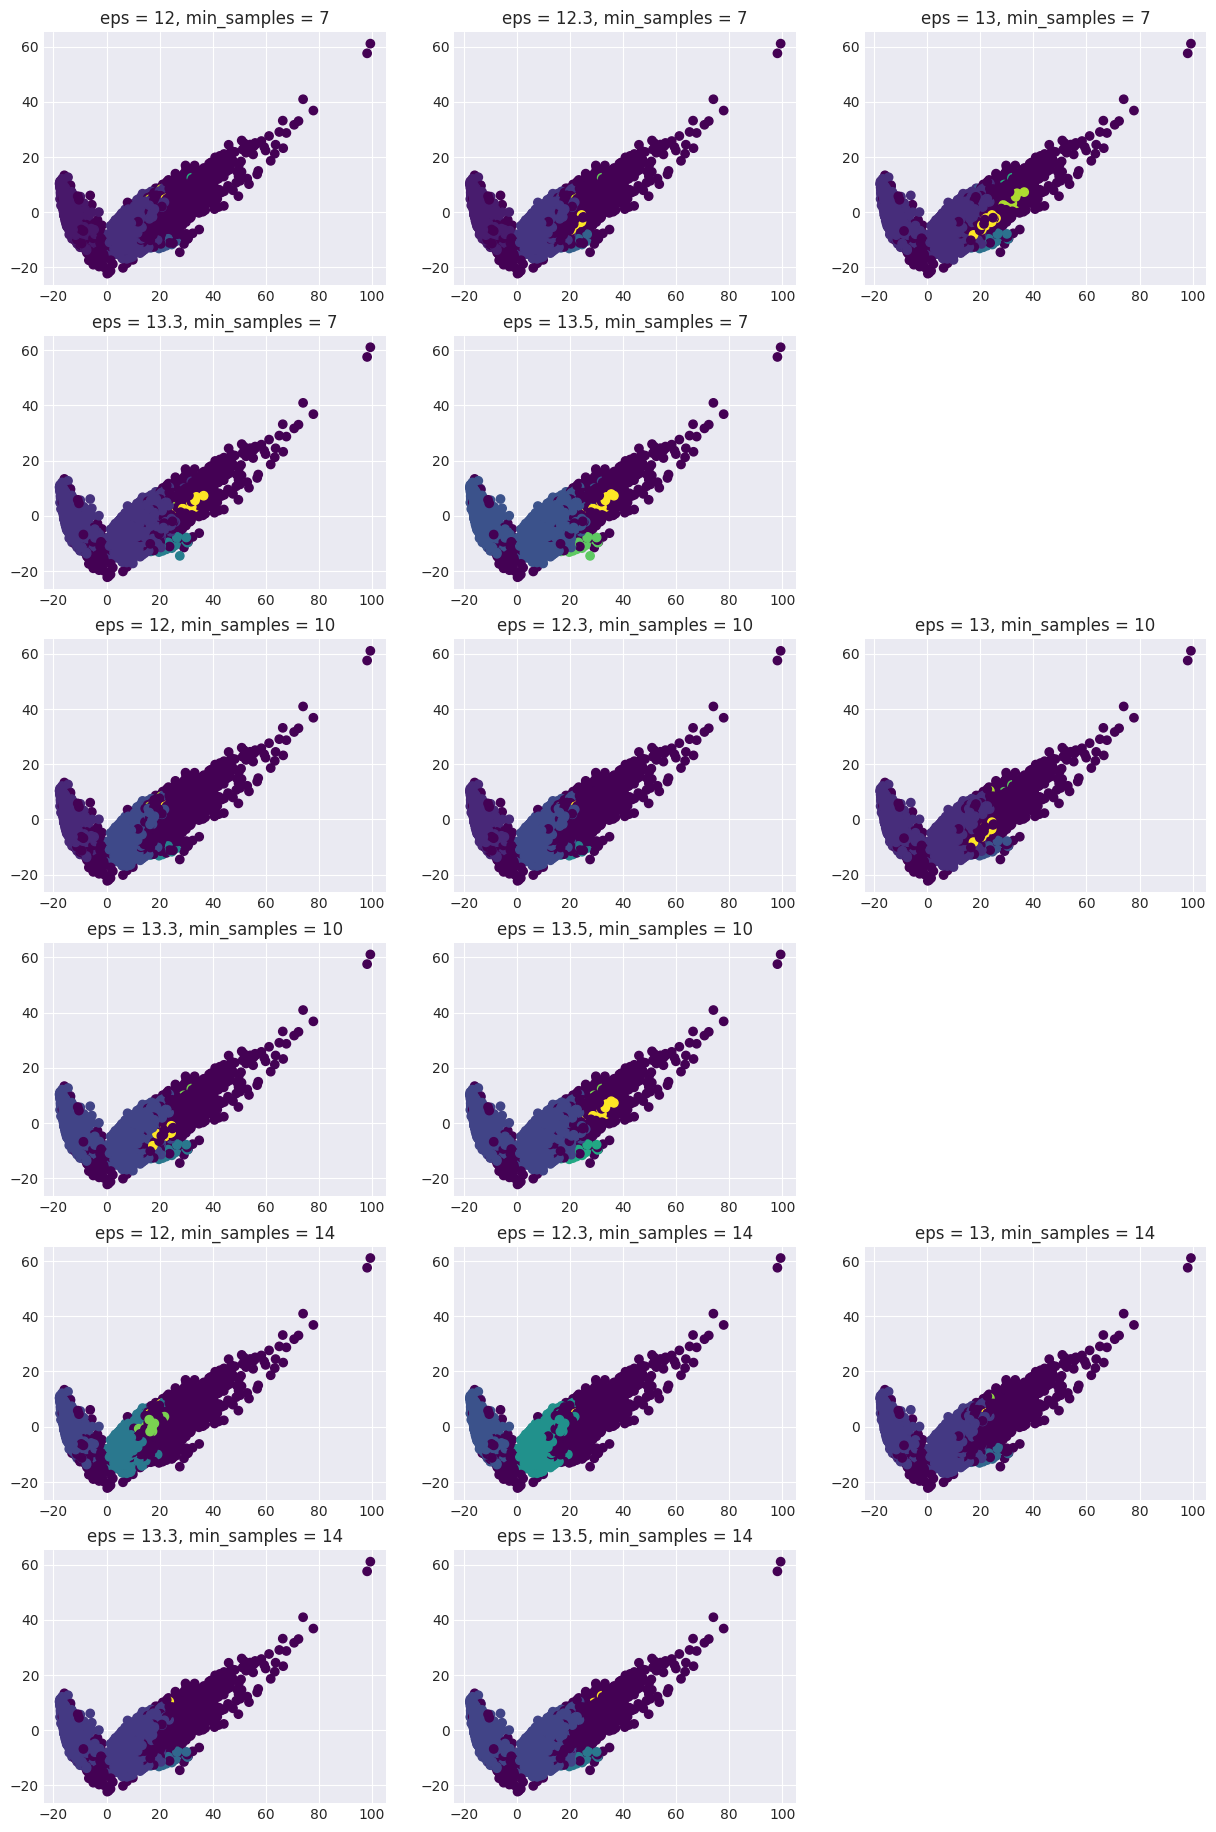

In [104]:
plt.figure(figsize= (15,23))
i = 1
for samples in [7, 10, 14]:
    for e in [12, 12.3, 13, 13.3, 13.5]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        plt.subplot(6, 3, i)
        plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters, cmap='viridis')
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

#сначала пробовала перебирать маленькие значения параметров, все точки были одного цвета. В итоге подбирала примерные значения через код ниже.

Text(0, 0.5, 'Distance')

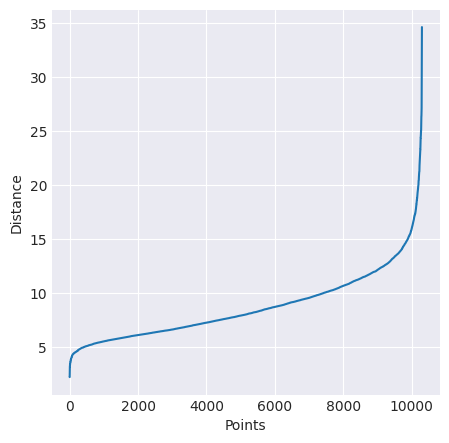

In [67]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(X_pca)

distances, indices = neighbors.kneighbors(X_pca)
distances = np.sort(distances[:,1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [68]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distances[knee.knee])

12.332223486435735


In [98]:
y_pred_dbscan = DBSCAN(eps=13.3, min_samples=14).fit_predict(X_pca)

In [100]:
set(labels)
#по графикам ничего не поняла, настраивала параметры, чтобы было 6 классов и шум, но не уверена, можно ли так

{-1, 0, 1, 2, 3, 4, 5}

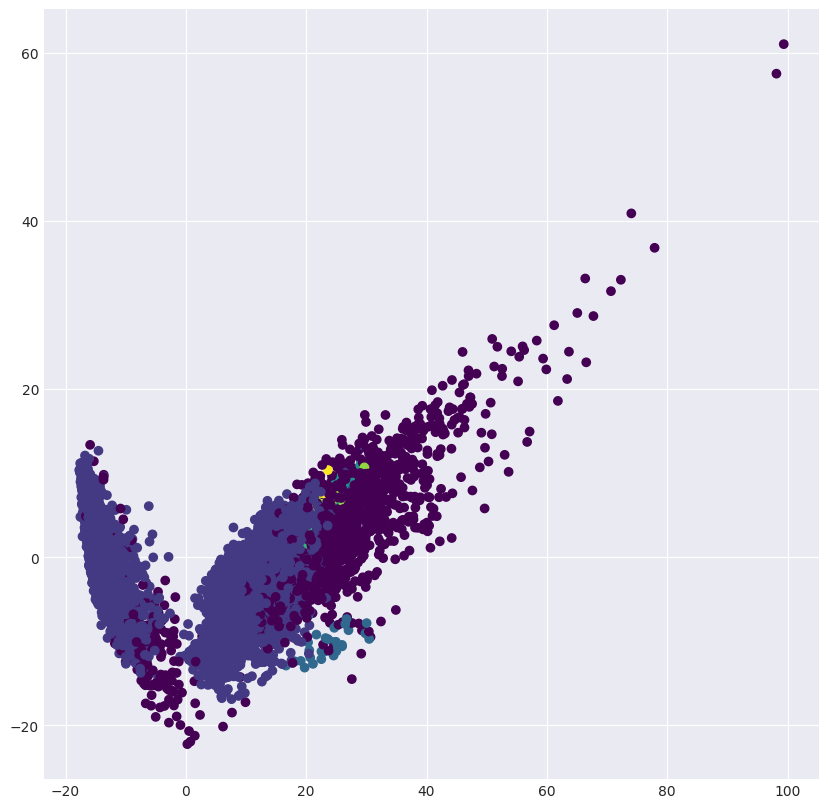

In [106]:
plt.figure(figsize= (10, 10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_pred_dbscan, cmap='viridis')
plt.show()

In [108]:
print(f"DBSCAN:\nHomogeneity: {metrics.homogeneity_score(y, y_pred_dbscan)}")
print(f"Completeness: {metrics.completeness_score(y, y_pred_dbscan)}")
print(f"V-measure: {metrics.v_measure_score(y, y_pred_dbscan)}")
print(f"Adjusted Rand-Index: {metrics.adjusted_rand_score(y, y_pred_dbscan)}")
print(f"Adjusted mutual info score: {metrics.adjusted_mutual_info_score(y, y_pred_dbscan)}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, y_pred_dbscan, sample_size=1000)}")


DBSCAN:
Homogeneity: 0.08178631358329962
Completeness: 0.2854423091579372
V-measure: 0.12714299899864925
Adjusted Rand-Index: 0.05027931368923576
Adjusted mutual info score: 0.12594101232308175
Silhouette Coefficient: -0.13360407518876447


In [120]:
y_pred_dbscan = DBSCAN(eps=12.3, min_samples=10).fit_predict(X_pca)

print(f"DBSCAN:\nHomogeneity: {metrics.homogeneity_score(y, y_pred_dbscan)}")
print(f"Completeness: {metrics.completeness_score(y, y_pred_dbscan)}")
print(f"V-measure: {metrics.v_measure_score(y, y_pred_dbscan)}")
print(f"Adjusted Rand-Index: {metrics.adjusted_rand_score(y, y_pred_dbscan)}")
print(f"Adjusted mutual info score: {metrics.adjusted_mutual_info_score(y, y_pred_dbscan)}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, y_pred_dbscan, sample_size=1000)}")


DBSCAN:
Homogeneity: 0.3813263998494092
Completeness: 0.6220164634797233
V-measure: 0.47280208458108525
Adjusted Rand-Index: 0.3208325900512795
Adjusted mutual info score: 0.47193101522535996
Silhouette Coefficient: -0.1288509051126697


Самые низкие метрики, с силуэтом совсем плохо. Возможно, я все-таки плохо подобрала гиперпараметры.

In [137]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='tied')
y_pred_gm = gmm.fit_predict(X_pca)

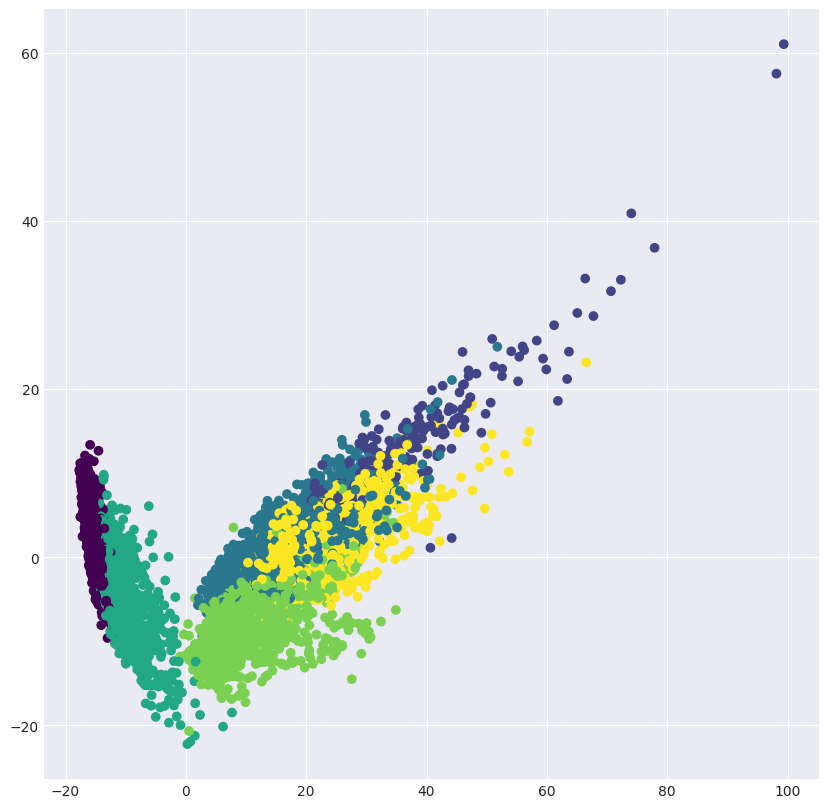

In [138]:
plt.figure(figsize = (10, 10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_pred_gm, cmap='viridis')
plt.show()

In [139]:
print(f"GaussianMixture:\nHomogeneity: {metrics.homogeneity_score(y, y_pred_gm)}")
print(f"Completeness: {metrics.completeness_score(y, y_pred_gm)}")
print(f"V-measure: {metrics.v_measure_score(y, y_pred_gm)}")
print(f"Adjusted Rand-Index: {metrics.adjusted_rand_score(y, y_pred_gm)}")
print(f"Adjusted mutual info score: {metrics.adjusted_mutual_info_score(y, y_pred_gm)}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, y_pred_gm, sample_size=1000)}")

GaussianMixture:
Homogeneity: 0.5720302316279952
Completeness: 0.6481716419793327
V-measure: 0.6077252994211579
Adjusted Rand-Index: 0.4360529890306894
Adjusted mutual info score: 0.6074413233197121
Silhouette Coefficient: 0.03200322727749243


GaussianMixture оказался вторым по качеству кластеризации после AgglomerativeClustering.

Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* в каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

In [157]:

from sklearn.manifold import TSNE

tsne = TSNE(random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_pca)



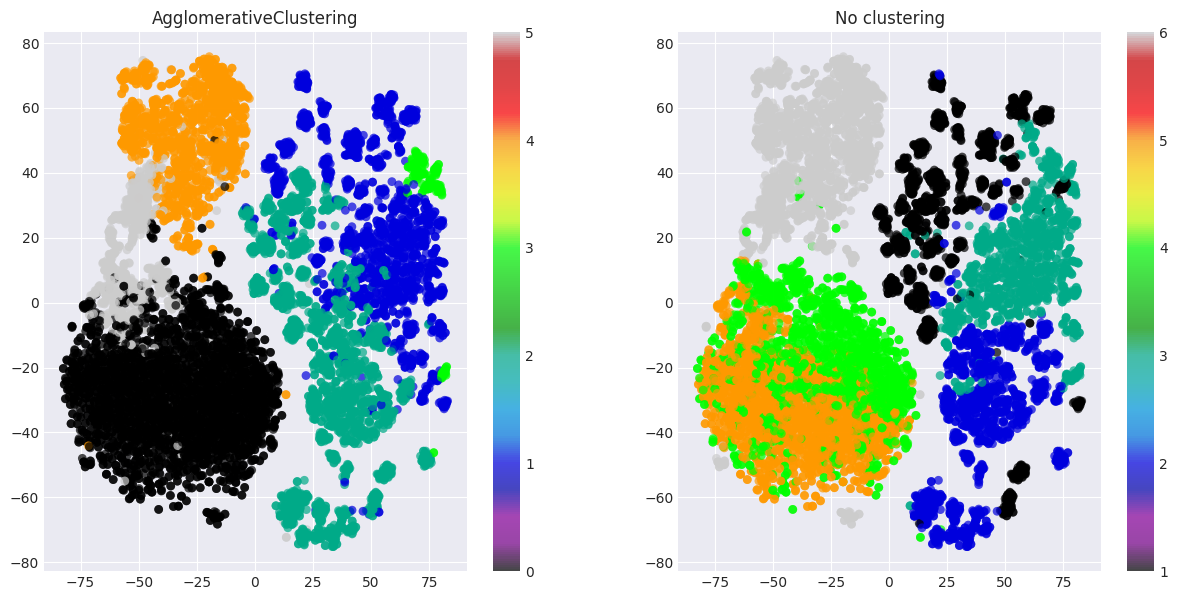

In [156]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_ag, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.title('AgglomerativeClustering')
plt.colorbar()


plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.title('No clustering')
plt.colorbar()

plt.show()

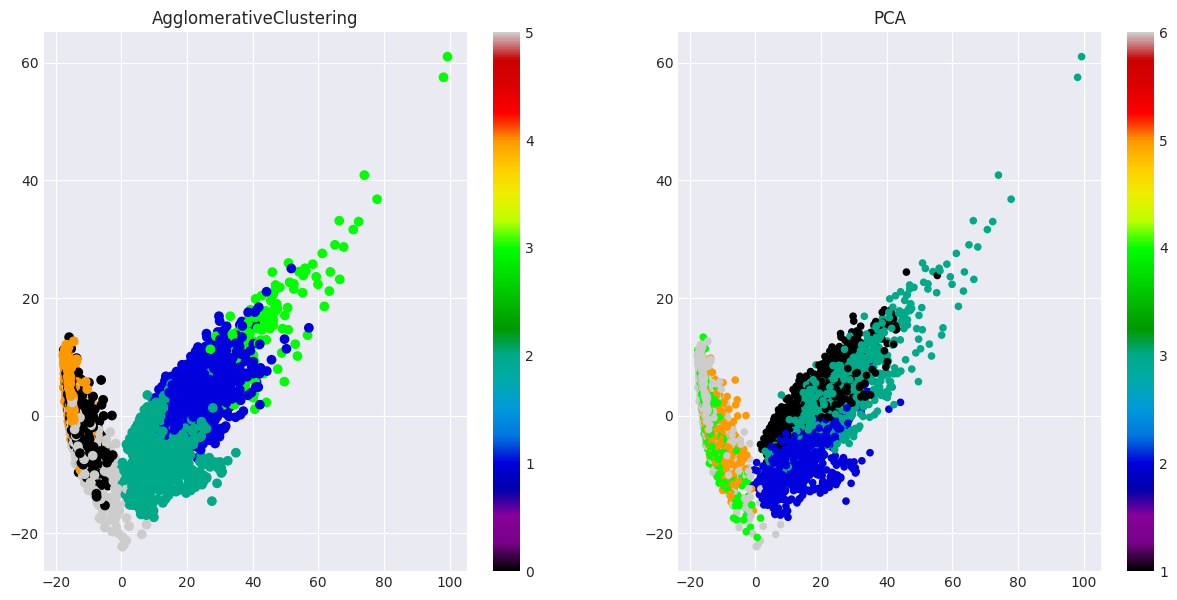

In [155]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_ag, cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.title('AgglomerativeClustering')
plt.colorbar()


plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.title('PCA')
plt.colorbar()

plt.show()

В целом кластеры выделены неплохо, там, где на графиках были видны явные плотные группы точек, они были объединены в один кластер. Между собой перепутаны сидение, стояние, лежание и ходьба, спуск, подъем по лестнице соответственно. Это в целом похожие между собой виды активности (или неактивности), соответственно, показатели вроде пульса, скорости и т.д. у них будут похожи. Причем точки отнесены к неверным классам там, где на графике они находятся на границе (очень не четкой) классов, возможно, показатели при ходьбе по лестнице с, например, низкой скоростью, не очень отличаются от показателей при обычной ходьбе.